# Preprocessing

In [1]:
!pip install --upgrade category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.2 MB/s eta 0:00:00


In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder

In [3]:
url = "https://drive.google.com/uc?id=1NWGtC7o6aHnvcPhfkfesP8bpRtksrewL"
dataset_file = "stunting_wasting_dataset.csv"
response = requests.get(url)
with open(dataset_file, "wb") as f:
    f.write(response.content)

In [4]:
data = pd.read_csv(dataset_file)
data

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight
...,...,...,...,...,...,...
99995,Laki-laki,11,75.3,7.3,Normal,Underweight
99996,Laki-laki,21,93.7,14.8,Normal,Risk of Overweight
99997,Perempuan,18,82.9,12.6,Normal,Risk of Overweight
99998,Laki-laki,7,73.6,5.5,Normal,Severely Underweight


In [5]:
print("Informasi Dataset:")
display(data.info())
print("\nJumlah Missing Values:")
display(data.isnull().sum())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


None


Jumlah Missing Values:


,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [6]:
if 'Stunting' in data.columns:
    print("\nDistribusi Kolom 'Stunting':")
    print(data['Stunting'].value_counts())
else:
    print("Kolom 'Stunting' tidak ditemukan dalam dataset.")


Distribusi Kolom 'Stunting':
Stunting
Normal              72312
Stunted             16160
Severely Stunted     5819
Tall                 5709
Name: count, dtype: int64


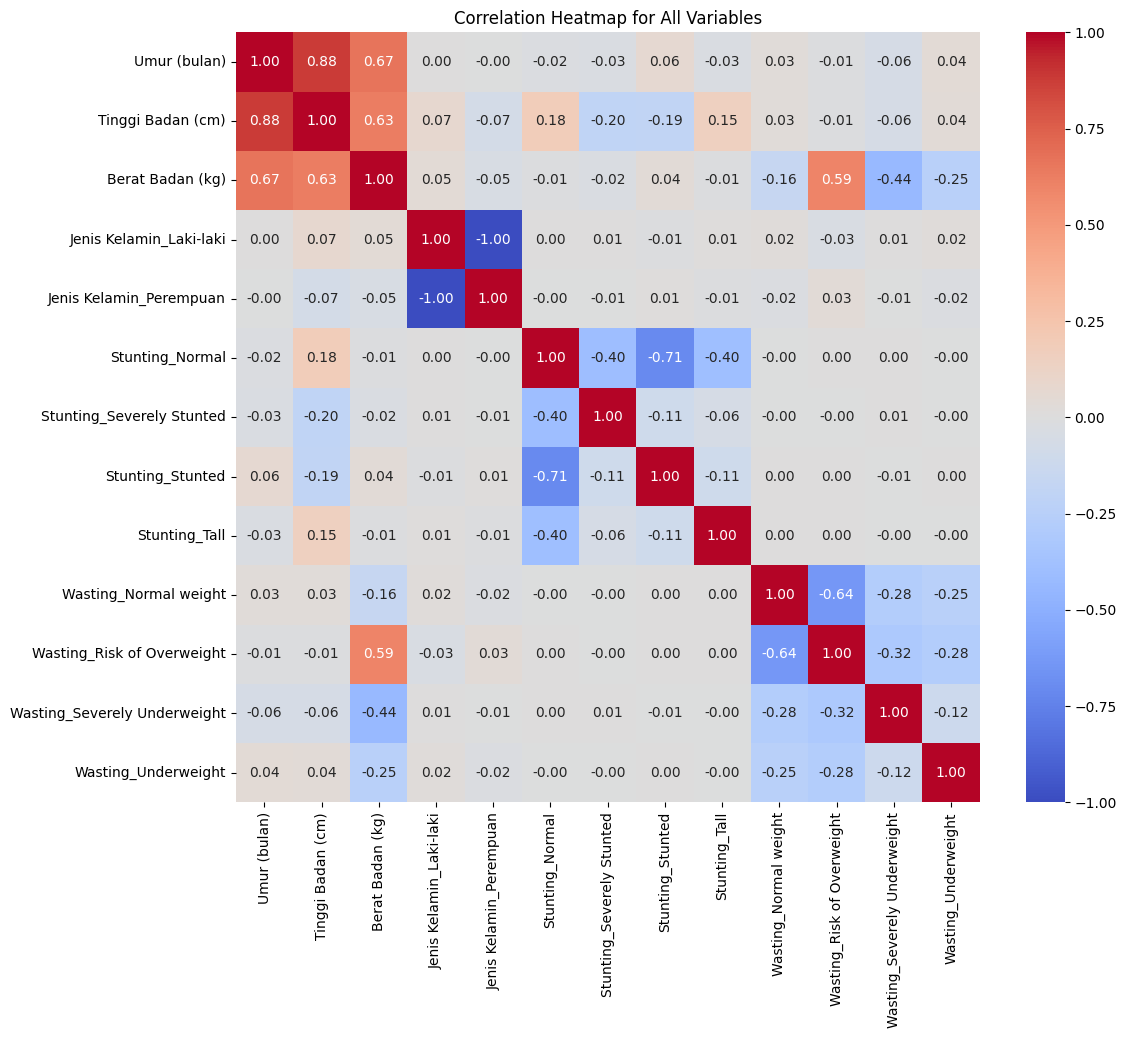

In [7]:
data_numerical = data.select_dtypes(include=['int64', 'float64'])

data_encoded = pd.get_dummies(data.select_dtypes(include=['object']))

data_combined = pd.concat([data_numerical, data_encoded], axis=1)

correlation_matrix_combined = data_combined.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for All Variables')
plt.show()

<ipython-input-8-2629125525c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Jenis Kelamin', data=data, palette='pastel')


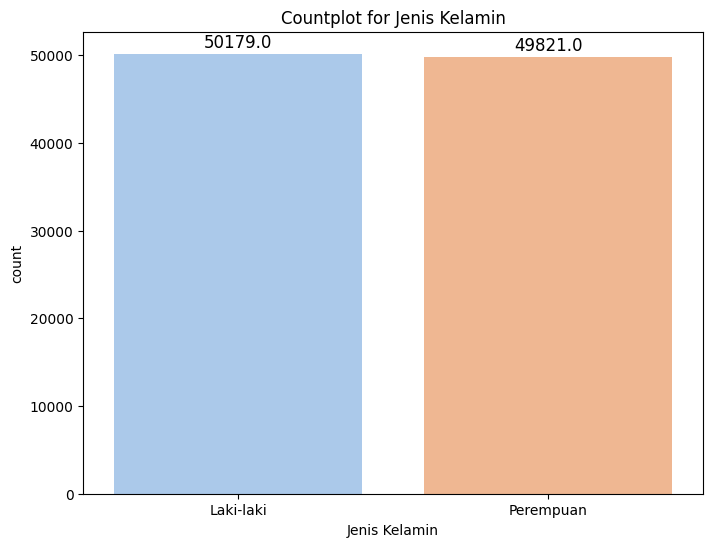

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Jenis Kelamin', data=data, palette='pastel')
plt.title('Countplot for Jenis Kelamin')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() /2., p.get_height()),
                       ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=12)
plt.show()

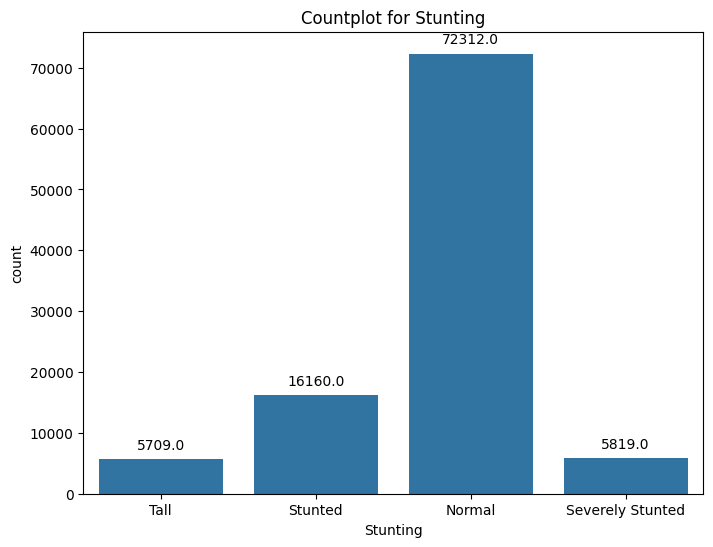

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Stunting', data=data)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Countplot for Stunting')
plt.show()

In [10]:
X = data.drop('Stunting', axis=1)
y = data['Stunting']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X_train.select_dtypes(exclude=['object']).columns.tolist()),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),
    ])

In [13]:
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [14]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# RF

In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train_encoded)

RandomForestClassifier(random_state=42)

In [20]:
rf_predictions = model.predict(X_test_encoded)

rf_predictions = label_encoder.inverse_transform(rf_predictions)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Accuracy:", rf_accuracy)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.99635

Random Forest Classification Report:
                  precision    recall  f1-score   support

          Normal       1.00      1.00      1.00     14406
Severely Stunted       0.99      0.99      0.99      1146
         Stunted       0.99      0.99      0.99      3292
            Tall       1.00      0.98      0.99      1156

        accuracy                           1.00     20000
       macro avg       1.00      0.99      0.99     20000
    weighted avg       1.00      1.00      1.00     20000



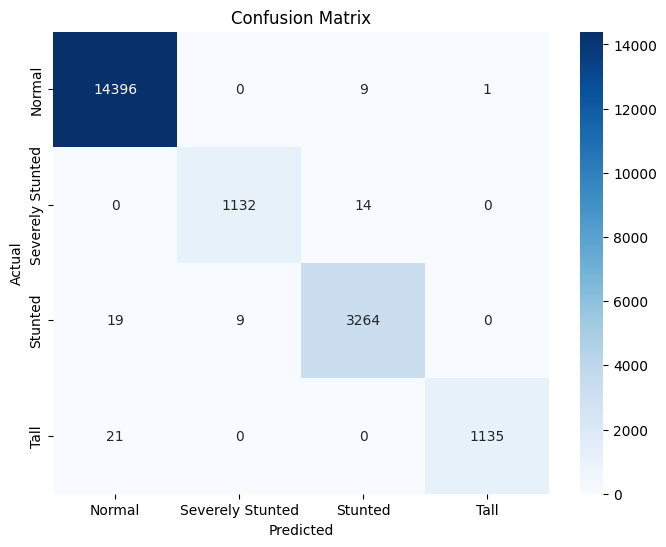

In [22]:
cm = confusion_matrix(y_test, rf_predictions, labels=label_encoder.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
from google.colab import files
import joblib

joblib.dump(model, 'rf.joblib')
files.download('rf.joblib')